In [32]:
import re
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
results = pd.read_json('../../data/survey/getResults_12_20.json')
results.head(40)

,ref1,ref2,result
0,34181799,4764461,2
1,34276,34166492,2
2,53559919,52019122,2
3,13846188,32496189,1
4,43227423,49069111,1
5,12336420,52048842,0
6,24821786,19345883,2
7,201936,21493140,1
8,46230181,3832376,1
9,32964156,771,2


In [29]:
articles = pd.read_csv('../../data/data_processed/articles_popularity_score.csv', index_col=0)
articles.head()

,title,categories,article_lenght,views,refs_count,link_count,death,locations,end_date_clean,ongoing,popularity_score
id,,,,,,,,,,,
771,American Revolutionary War,military conflict,0.375011,0.259929,0.598,0.634364,70000,Eastern North America|Caribbean Sea|Indian ...,1783.0,False,1.867305
863,American Civil War,military conflict,0.319410,0.522999,0.212,0.532646,828000,Southern United States Q49042|Northern Uni...,1865.0,False,1.587055
3793,Battle of Bosworth Field,military conflict,0.152325,0.032733,0.034,0.208935,0,Ambion Hill Q4741491|Battle of Bosworth F...,1485.0,False,0.427993
4005,Battle of Pharsalus,military conflict,0.034510,0.017785,0.020,0.067354,230,Farsala Q985596,0.0,False,0.139650
4049,Battle of Blenheim,military conflict,0.104371,0.013543,0.095,0.137457,24968,Blindheim Q514914,1704.0,False,0.350371


In [37]:
def winner(a_row):
    if a_row['result']:
        return np.float(a_row['ref' + str(a_row['result'])])
    return np.nan

In [38]:
articles.loc[results[results.result == 0].iloc[0].ref1]

title                                    War in North-West Pakistan
categories                     military conflict, military conflict
article_lenght                                             0.297219
views                                                     0.0219667
refs_count                                                    0.262
link_count                                                 0.580756
death                                                         20766
locations           Federally  Administered  Tribal  Areas  Q208270
end_date_clean                                                 2004
ongoing                                                       False
popularity_score                                            1.16194
Name: 12336420, dtype: object

In [40]:
type(winner(results[results.result == 0].iloc[0]))

float

In [50]:
for row in results.iloc[3:50].iterrows():
    print(winner(row))

TypeError: tuple indices must be integers or slices, not str

In [47]:
articles[articles.end_date_clean > 2000].sort_values(by="popularity_score")

,title,categories,article_lenght,views,refs_count,link_count,death,locations,end_date_clean,ongoing,popularity_score
id,,,,,,,,,,,
49532277,Hashimiya attack,civilian attack,0.000558,0.000021,0.000,0.000687,75,Hashimiya|Iraq,2014.0,False,0.001267
56640476,Operation of Sidi Aïch,military conflict,0.002870,0.000005,0.001,0.000000,0,Sidi Aïch|Tunisia,2015.0,False,0.003875
49532230,5 February 2014 Baghdad bombings,civilian attack,0.001437,0.000015,0.001,0.002062,32,Baghdad|Iraq,2014.0,False,0.004514
50373289,Sizzlers massacre,civilian attack,0.000720,0.000205,0.002,0.002062,9,Sea Point Q2383557,2003.0,False,0.004987
49429234,Monguno bombing,civilian attack,0.000963,0.000013,0.002,0.002062,63,Monguno Q15043599,2015.0,False,0.005038
48494190,Kurram incident,military conflict,0.001447,0.000040,0.001,0.002749,0,Durand Line Q288292,2010.0,False,0.005236
55571911,2016 Coimbatore riots,civil conflict,0.001280,0.000021,0.001,0.004124,0,Coimbatore|Tamil Nadu,2016.0,False,0.006424
48494246,Datta Khel incident,military conflict,0.001850,0.000074,0.002,0.002749,0,Durand Line Q288292,2011.0,False,0.006673
49532254,2014 Hillah bombing,civilian attack,0.001051,0.000098,0.001,0.004811,45,Hillah Q243846,2014.0,False,0.006959


In [51]:
articles.popularity_score.describe()

count    17459.000000
mean         0.106583
std          0.149437
min          0.001267
25%          0.033239
50%          0.059036
75%          0.117079
max          2.588225
Name: popularity_score, dtype: float64

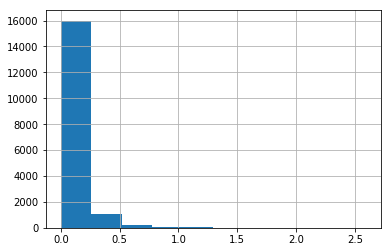

In [53]:
articles.popularity_score.hist();